# 1. Data Preparation for Gauss Hermite kinematics

This notebook shows how to prepare input kinematic data files from Gauss-Hermite files from the CALIFA and ATLAS-3D surveys.

Run this notebook from the directory ``docs/tutorial_notebooks``.

First, import some modules...

In [1]:
import os
import dynamite as dyn

## CALIFA 

Example galaxy: **NGC 6278**. A Schwarzschild model for this galaxy can be found in [Zhu et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018MNRAS.473.3000Z/abstract).

Galaxy: NGC6278
NGC6278_input/NGC6278.V1200.rscube_INDOUSv2_SN20_stellar_kin.fits
  Kin PA: 126.0  +/-   1.2  (3*sigma error)
Velocity Offset: -12.33
The pixel size is 1.0
PA: 126.0
Total bins: 152
Pixel grid dimension is  58.0 52.0
Vels plot: 197.20913252580198, 65.0832933754251, 218.18955410204666


/opt/anaconda3/lib/python3.9/site-packages/matplotlib/colors.py:718: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/colors.py:718: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


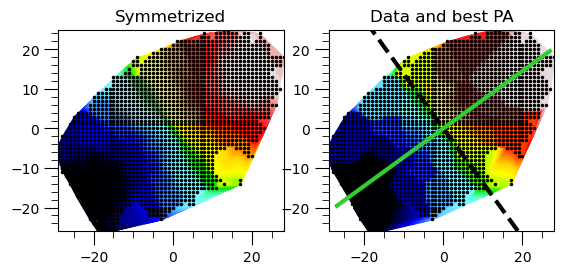

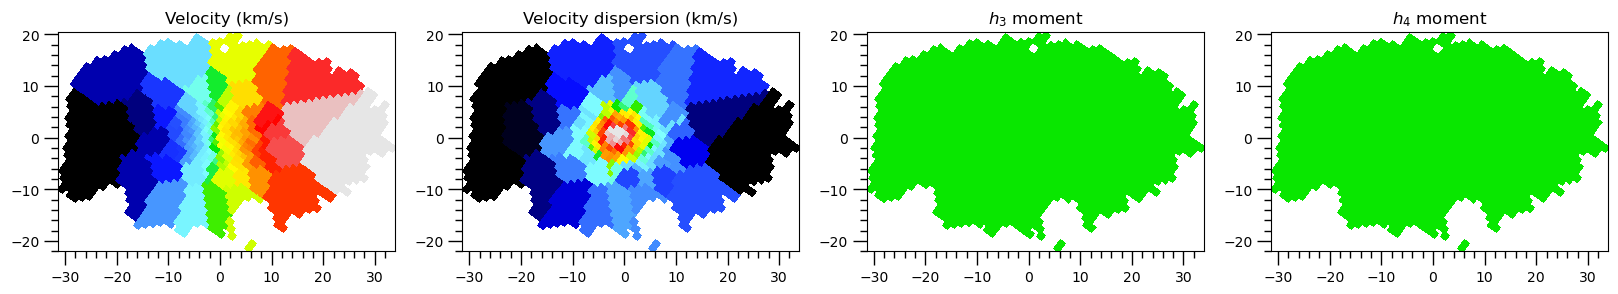

In [2]:
from dynamite.data_prep.generate_kin_input import create_kin_input

# Input directory
in_dir = 'NGC6278_input/'

# The CALIFA stellar kinematic file for NGC 6278 can be found here:
in_file = 'NGC6278_input/NGC6278.V1200.rscube_INDOUSv2_SN20_stellar_kin.fits'

# The output will be placed here:
out_dir = 'NGC6278_input/dynamite_input/'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Convert file to ECSV, fit the kinematic PA,
#write aperture.dat and bins.dat files
create_kin_input('NGC6278', in_file, out_dir, expr='', 
                 fit_PA=True, kin_input='CALIFA')

# Add the PSF to the header of the kinematic file
gh = dyn.kinematics.GaussHermite()
gh.add_psf_to_datafile(sigma=[1.06], weight=[1.0],
                       datafile=f'{out_dir}/gauss_hermite_kins.ecsv')

The directory `NGC6278_input/dynamite_input` should now contain the following files:

- `mge.ecsv` (this file was already present)
- `gauss_hermite_kins.ecsv` 
- `aperture.dat`            
- `bins.dat`

together with some diagnostic plots. These files are the complete input needed to run DYNAMITE!

## ATLAS 3D 

Example galaxy: **NGC 4570**. Schwarzschild models for this galaxy can be found in [Thater et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019A%26A...625A..62T/abstract).

In [ ]:
from dynamite.data_prep.generate_kin_input import create_kin_input

# Input directory
in_dir = 'NGC4570_input/'

# For ATLAS3D data, two input/files are needed: the original cube and 
# the kinematics cube. They can be found here:
in_files =[in_dir+'MS_NGC4570_r1_C2D.fits',
           in_dir+'NGC4570_4moments_ATLAS3d.fits']

# The output will be placed here:
out_dir = 'NGC4570_input/dynamite_input/'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Convert file to ECSV, fit the kinematic PA, 
# write aperture.dat and bins.dat files
create_kin_input('NGC4570', in_files, out_dir, expr='',
                 fit_PA=True, kin_input='ATLAS3D', ngh=6)

# Add the PSF to the header of the kinematic file
gh = dyn.kinematics.GaussHermite()
gh.add_psf_to_datafile(sigma=[1.5], weight=[1.0],
                       datafile=f'{out_dir}/gauss_hermite_kins.ecsv')

The directory `NGC4570_input/dynamite_input` should now contain the following files:

- `gauss_hermite_kins.ecsv`
- `aperture.dat`            
- `bins.dat`

together with some diagnostic plots. These files are your kinematic input for DYNAMITE. In addition, you will only need a file containing a Multi Gaussian Expansion (MGE) describing the stellar surface density of the galaxy.

## Preparing other Gauss Hermite data files 

To prepare DYNAMITE input from other surveys, or from your own fits, we recommend looking at the functions defined in `dynamite/data_prep/generate_kin_input.py` and adjusting them to your needs.

The file `aperture.dat` contains the spatial extent in arcseconds, the angle (in degrees) `90 - position_angle`, and the size of the grid in pixels:

```
    #counter_rotation_boxed_aperturefile_version_2
          min_x   min_y
          max_x   max_y
          90.-position_angle
          npix_x  n_pix_y
```     

The file `bins.dat` encodes the spatial (e.g. Voronoi) binning: specifically, it has one header line with the total number of pixels in the grid, followed by the bin ID of each pixel in the grid.